In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.ensemble import GradientBoostingClassifier as GBC, GradientBoostingRegressor as GBR
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import joblib

def draw_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    # plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
    plt.yticks([0, 1], ['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def draw_ROC(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def train(df, model_filename, reg=False):
    X = df.drop('fraud', axis=1)
    y = df['fraud']
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.4, random_state=0)
    
    if reg:
        model = GBR().fit(X_train, y_train)
        prob = model.predict(X_test)
        pred = (prob >= 0.5).astype(int)
        draw_confusion(y_test, pred)
        draw_ROC(y_test, prob)
    else:
        model = GBC().fit(X_train, y_train)
        pred = model.predict(X_test)
        draw_confusion(y_test, pred)
        y_scores = model.predict_proba(X_test)[:, 1]
        draw_ROC(y_test, y_scores)
    
    joblib.dump(model, model_filename)
    
    print("Model saved to", model_filename)
    print("Classification Report:")
    print(classification_report(y_test, pred))


Confusion Matrix:
[[365001     48]
 [   158  34793]]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

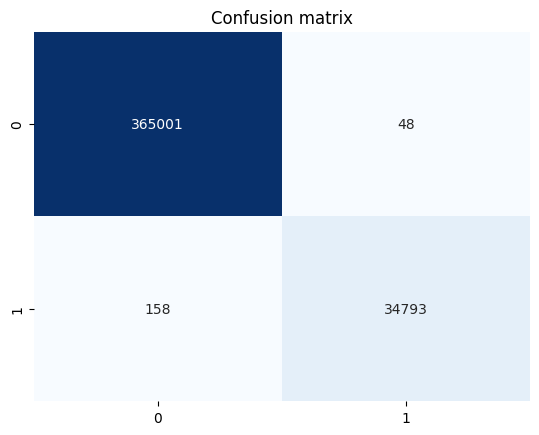

In [9]:
df = pd.read_csv("card_transdata.csv")
train(df, "card_transdata_cl", reg=False)

Confusion Matrix:
[[364956     93]
 [   250  34701]]


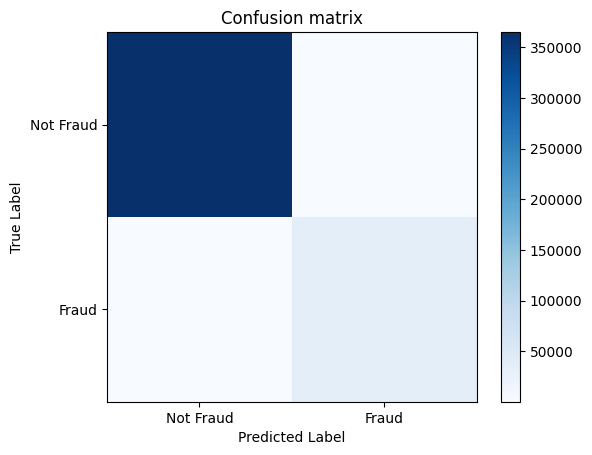

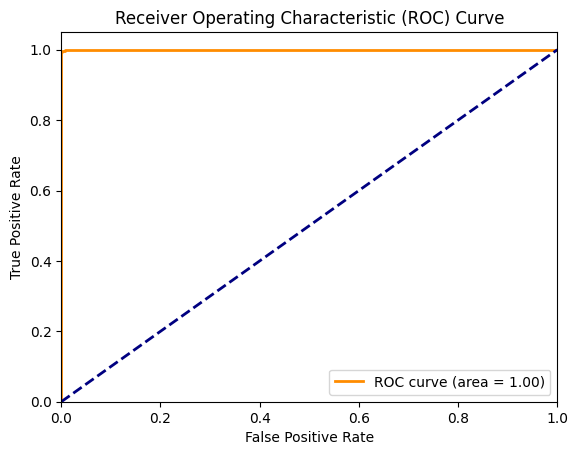

Model saved to card_transdata_re
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      0.99      1.00     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [3]:
df = pd.read_csv("card_transdata.csv")
train(df, "card_transdata_re", reg=True)

Confusion Matrix:
[[364991     58]
 [    21  34930]]


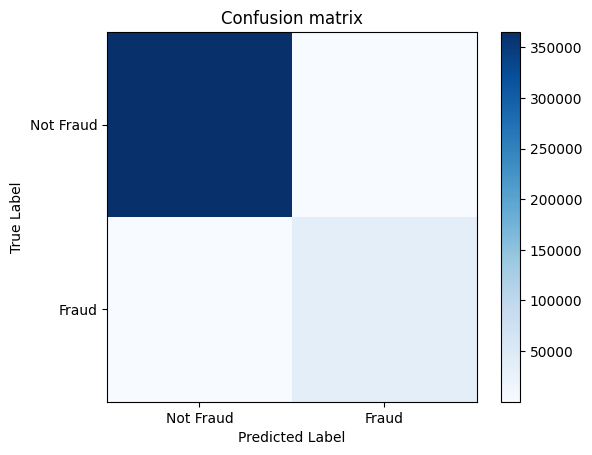

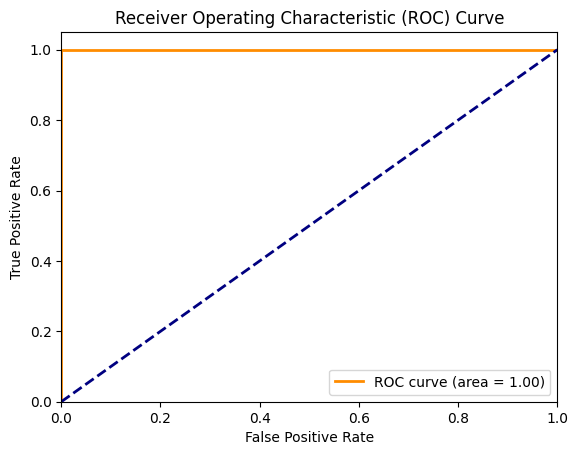

Model saved to concatenated_file_cl
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      1.00      1.00     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [4]:
df = pd.read_csv("concatenated_file.csv")
train(df, "concatenated_file_cl", reg=False)

Confusion Matrix:
[[364949    100]
 [   283  34668]]


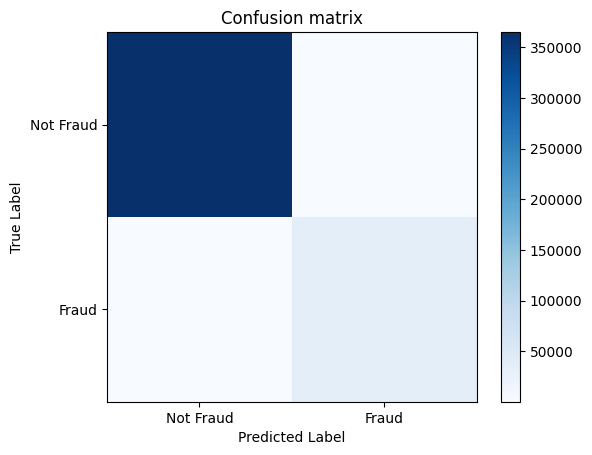

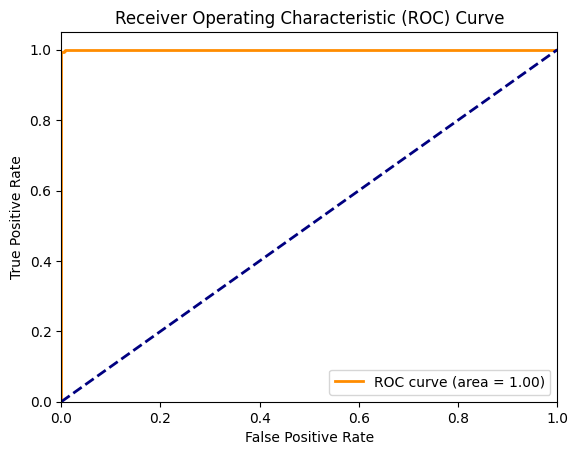

Model saved to concatenated_file_re
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      0.99      0.99     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [5]:
df = pd.read_csv("concatenated_file.csv")
train(df, "concatenated_file_re", reg=True)

Confusion Matrix:
[[364962     87]
 [    89  34862]]


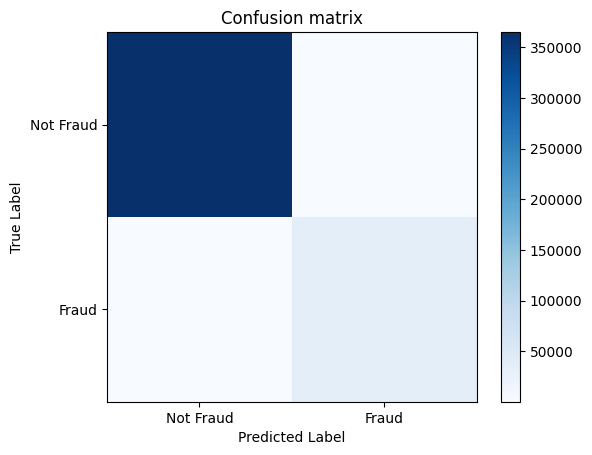

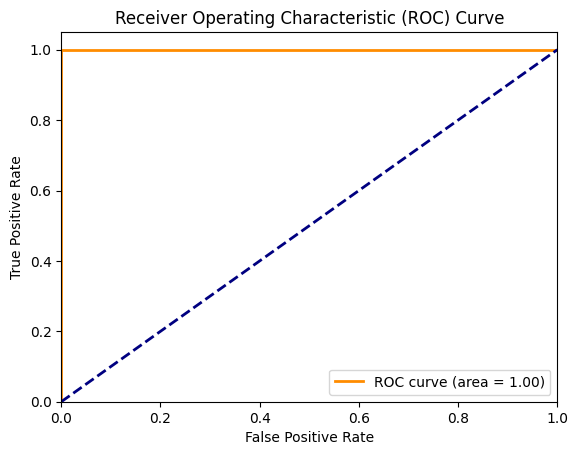

Model saved to features_imp_cl
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      1.00      1.00     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [6]:
df = pd.read_csv("features_imp.csv")
train(df, "features_imp_cl", reg=False)

Confusion Matrix:
[[364949    100]
 [   283  34668]]


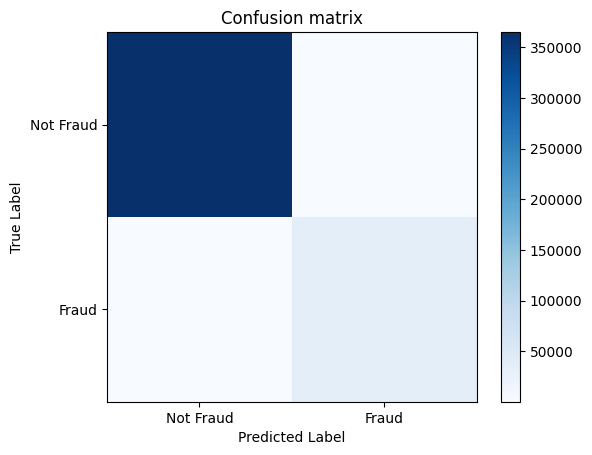

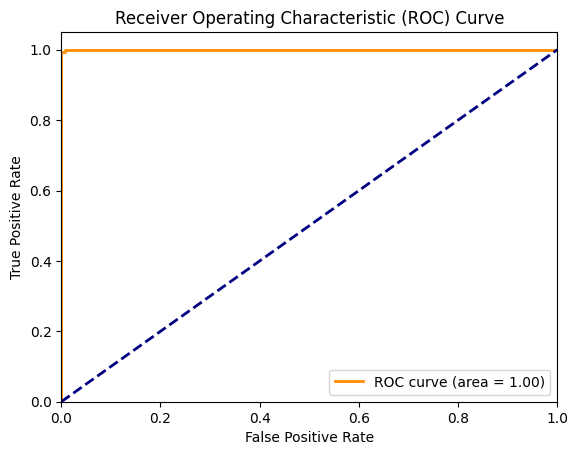

Model saved to features_imp_re
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    365049
         1.0       1.00      0.99      0.99     34951

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



In [7]:
df = pd.read_csv("features_imp.csv")
train(df, "features_imp_re", reg=True)

## load


In [10]:
def load_and_evaluate_model(test_data, model_filename, reg=False):
    # Load the saved model
    loaded_model = joblib.load(model_filename)

    # Separate features and target from the test data
    X_test = test_data.drop('fraud', axis=1)
    y_test = test_data['fraud']

    if reg:
        # For regression, use predict function
        prob = loaded_model.predict(X_test)
        pred = (prob >= 0.5).astype(int)
        draw_confusion(y_test, pred)
        draw_ROC(y_test, prob)
    else:
        # For classification, use predict function or predict_proba for ROC curve
        pred = loaded_model.predict(X_test)
        draw_confusion(y_test, pred)
        y_scores = loaded_model.predict_proba(X_test)[:, 1]
        draw_ROC(y_test, y_scores)


df_test = pd.read_csv('path_to_test_data.csv')  # Replace 'path_to_test_data.csv' with the actual path
load_and_evaluate_model(df_test, 'your_model_filename.pkl', reg=False)

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_test_data.csv'

In [12]:
model_names = ["card_transdata_re","card_transdata_cl","concatenated_file_cl","concatenated_file_re","features_imp_re","features_imp_cl"]

Confusion Matrix:
[[912505     92]
 [   415  86988]]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

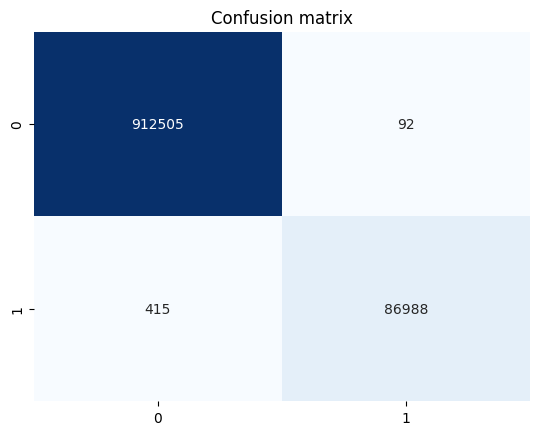

In [23]:
for _, csv_file in enumerate(csv_files):
    df_test = pd.read_csv(csv_file+'.csv')
    for i in range(2): 
        if i == 0: # Replace 'path_to_test_data.csv' with the actual path
            load_and_evaluate_model(df_test, csv_file+"_cl", reg=False)
        else:
            load_and_evaluate_model(df_test, csv_file+"_re", reg=True)


In [18]:
original_list = ["card_transdata_re", "card_transdata_cl", "concatenated_file_cl", "concatenated_file_re", "features_imp_re", "features_imp_cl"]

modified_list = [s.replace("_cl", "").replace("_re", "") for s in original_list]

csv_files = list(set(modified_list))


In [28]:
files = list(set(modified_list))
files


['card_transdata', 'concatenated_file', 'features_imp']

In [25]:
csv_files

['card_transdata_re',
 'card_transdata_cl',
 'concatenated_file_cl',
 'concatenated_file_re',
 'features_imp_re',
 'features_imp_cl']

Confusion Matrix:
[[912505     92]
 [   415  86988]]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

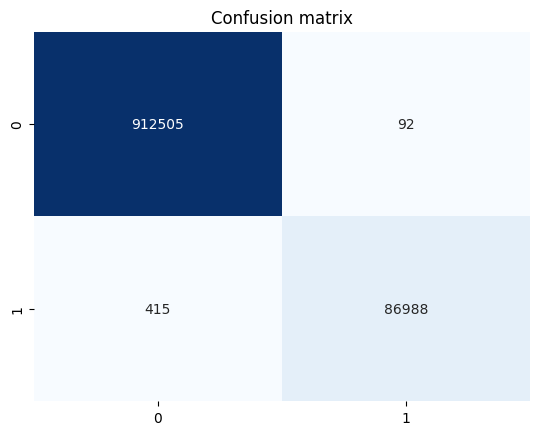

In [29]:
def load_and_evaluate_model(df_test, model_filename, reg=False):
    # Load the pre-trained model
    loaded_model = joblib.load(model_filename)

    # Assuming 'fraud' is the target column in your test data
    X_test = df_test.drop('fraud', axis=1)
    y_test = df_test['fraud']

    if reg:
        prob = loaded_model.predict(X_test)
        pred = (prob >= 0.5).astype(int)
        draw_confusion(y_test, pred)
        draw_ROC(y_test, prob)
    else:
        pred = loaded_model.predict(X_test)
        draw_confusion(y_test, pred)
        y_scores = loaded_model.predict_proba(X_test)[:, 1]
        draw_ROC(y_test, y_scores)

    print("Evaluation completed for", model_filename)
    print("Classification Report:")
    print(classification_report(y_test, pred))

# Assuming csv_files is a list of filenames (without extension) you want to process
csv_files = ['card_transdata', 'concatenated_file', 'features_imp']

for csv_file in csv_files:
    df_test = pd.read_csv(csv_file + '.csv')

    # Assuming you have saved models with the filenames "model_filename_cl" and "model_filename_re"
    load_and_evaluate_model(df_test, f"{csv_file}_cl", reg=False)
    load_and_evaluate_model(df_test, f"{csv_file}_re", reg=True)
